# FN model for highly curved tip emitters

$J(F) = A\phi^{-1}F^2(t[y] + \frac{\phi}{eFR} \psi[y])^{-2} \exp(-\frac{B\phi^{3/2}}{F}(\nu [y] + \frac{\phi}{eFR} \omega[y]))$

Here, 

$\omega[y] \approx \frac{4}{5} - \frac{7y^2}{40} - \frac{y^2 \ln[y]}{100}$\
$\psi[y] = \frac{5}{3}y\frac{d\omega}{dy} \approx \frac{4}{3} - \frac{y^2}{500} - \frac{y^2 \ln[y]}{15}$

This equation is valid for tip radii greater than 5nm (in our case we use 200nm, so its fine), for surface fields in the range $3 \cdot 10^{9}$ V/m < F < $10^{10}$ V/m and for work functions in the range $3 eV < \phi < 5 eV$

In case the curvature radii is too large, this equation reduces to the standard FN equation

This calculation is based on Patterson's phD thesis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:

def J(F, typeOfFN):
    phi = 4.8
    h = 6.582e-16 *1e18
    e = 1
    a = e**3/(8*np.pi*h)
    A = 1.54e-6
    #print(a)
    B = 6.83    
    #result = []
    if typeOfFN == 'elemental':
        j = A * F**2/phi * np.exp(-B * phi**(3/2)/F)
        #result.append(j)
    if typeOfFN == 'elemental_corr':
        y = 1.439964*F/phi**2
        ln = np.log(y)
        nu = 1 - y + 1/6*y*ln
        j = A/phi* F**2 * np.exp(-nu*B*phi**(3/2)/F)
        #j= A/phi*F**2*np.exp(-B*phi**(3/2)/F)
        #result.append(j)
        #result.append(j_corr)
    
    if typeOfFN == 'sharp-emitter':
        R = 200000
        y = 2*np.sqrt(B*F)/phi
        ln = np.log(y)
        nu = 1 - y**2 + 1/3*y**2 * ln
        #epsilon = 55.263 * 1e15 # e^2 eV^-1 m^-1    
        EF = 0#1.12
        psi = 4/3 - y**2/500 - y**2 * ln/15
        omega = 4/5 - 7*y**2/40 - y**2*ln/100
        t = 1 + 1/9 * y**2 - 1/9 * y**2 * ln
        j = A/phi*F**2*(t + phi/(e*F*R) * psi)**(-2) * 1/np.exp(B*phi**(3/2)/F*(nu + phi/(e*F*R) * omega))
        #result.append(j_sharp)


    #print(f'A value is {A}')
    #print(f'B value is {B}')  
    #y = 2*np.sqrt(B*F)/phi
    #print(f'y value is {y}')
    #print(f'ln of y is {ln}')
    #print(f'psi value is {psi}')
    #print(f'omega value is {omega}')
    #B = 8*math.pi np.sqrt(2*m0) / (3*e*h)
    #nu = 1 - y**2 + (1/3 * y**2 * ln)
    #print(f'nu value is {nu}')
    #print(f't value is {t}')
    #print(f'current density is {j}')
    return j

In [10]:
result_1 = J(10, "elemental")
result_2 = J(10, "elemental_corr")
result_3 = J(10, "sharp-emitter")

print(result_1)
print(result_2)
print(result_3)

2.4373035856285056e-08
3.084549052042325e-06
284686885313136.44


In [11]:
Fd = np.arange(1, 100, 0.01)
currents_ele = []
currents_corr = []
currents_sharp = []
for i in range(0,len(Fd)):
    current = J(Fd[i], "elemental")
    currents_ele.append(current)

for i in range(0,len(Fd)):
    current = J(Fd[i], "elemental_corr")
    currents_corr.append(current)

for i in range(0,len(Fd)):
    current = J(Fd[i], "sharp-emitter")
    currents_sharp.append(current)


print(currents_ele)

[np.float64(2.05390769904674e-38), np.float64(4.2665041364196774e-38), np.float64(8.73820873236329e-38), np.float64(1.7652641413720885e-37), np.float64(3.5188863322772033e-37), np.float64(6.924265919494135e-37), np.float64(1.3454690249187908e-36), np.float64(2.5826034678846663e-36), np.float64(4.898608950154046e-36), np.float64(9.184603349232972e-36), np.float64(1.7027742398896152e-35), np.float64(3.122441463235702e-35), np.float64(5.664987511988467e-35), np.float64(1.0171696572413497e-34), np.float64(1.8079887005374885e-34), np.float64(3.1821444792484586e-34), np.float64(5.547227957464526e-34), np.float64(9.58010757778885e-34), np.float64(1.6394785343986254e-33), np.float64(2.7808741720246466e-33), np.float64(4.6762010497111434e-33), np.float64(7.797117129436331e-33), np.float64(1.2894181148708615e-32), np.float64(2.1152376558417067e-32), np.float64(3.4428201582959524e-32), np.float64(5.560843348735922e-32), np.float64(8.914909815912376e-32), np.float64(1.4187946913445322e-31), np.flo

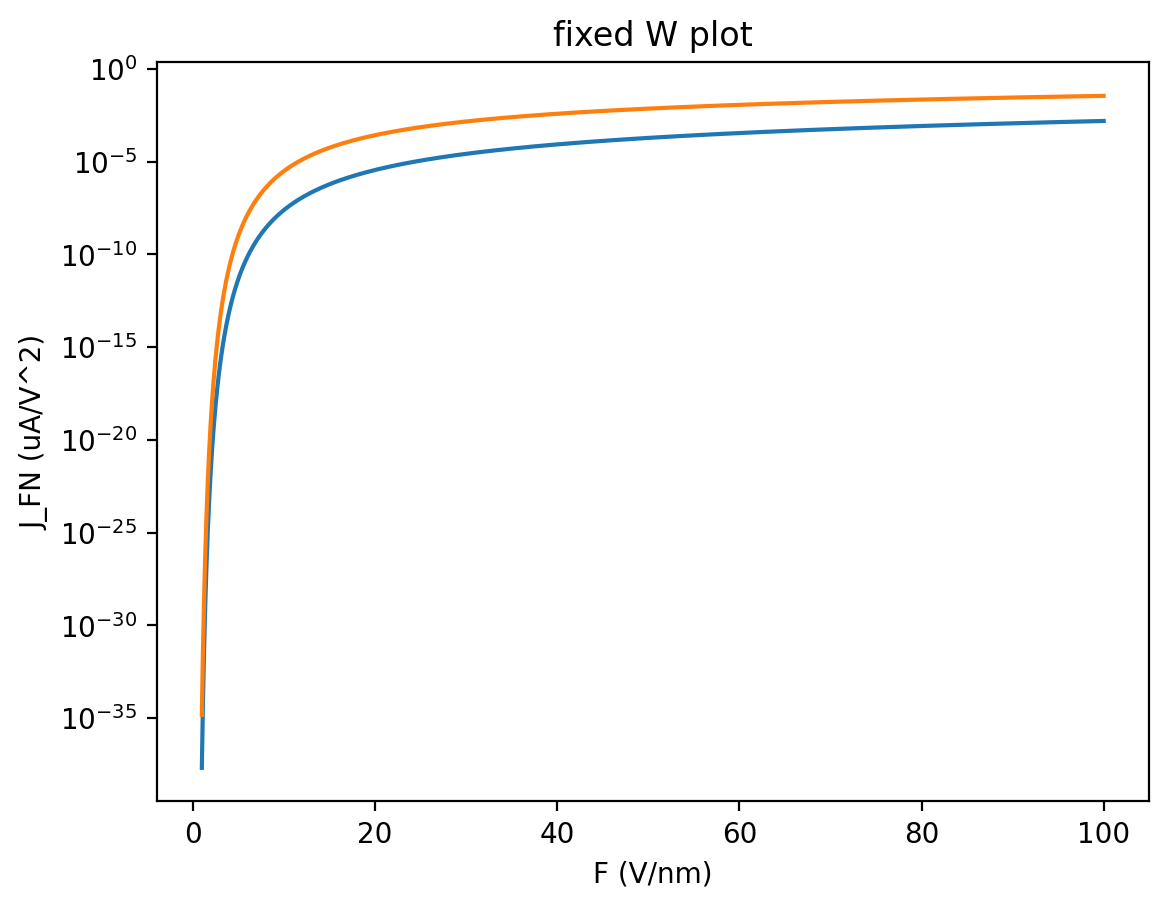

In [12]:
plt.figure(dpi=200)

plt.plot(Fd, currents_ele, label = 'ele')

plt.plot(Fd, currents_corr, label = 'corr')

#plt.plot(Fd, currents_sharp, label = 'sharp')

#plt.xlim(2, 4)
#plt.ylim(1e-11, 1e-6)
plt.yscale("log")

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')

#plt.legend()

plt.show()

[-86.77848936 -86.06733941 -85.37013357 ... -15.67082106 -15.67074919
 -15.67067735]


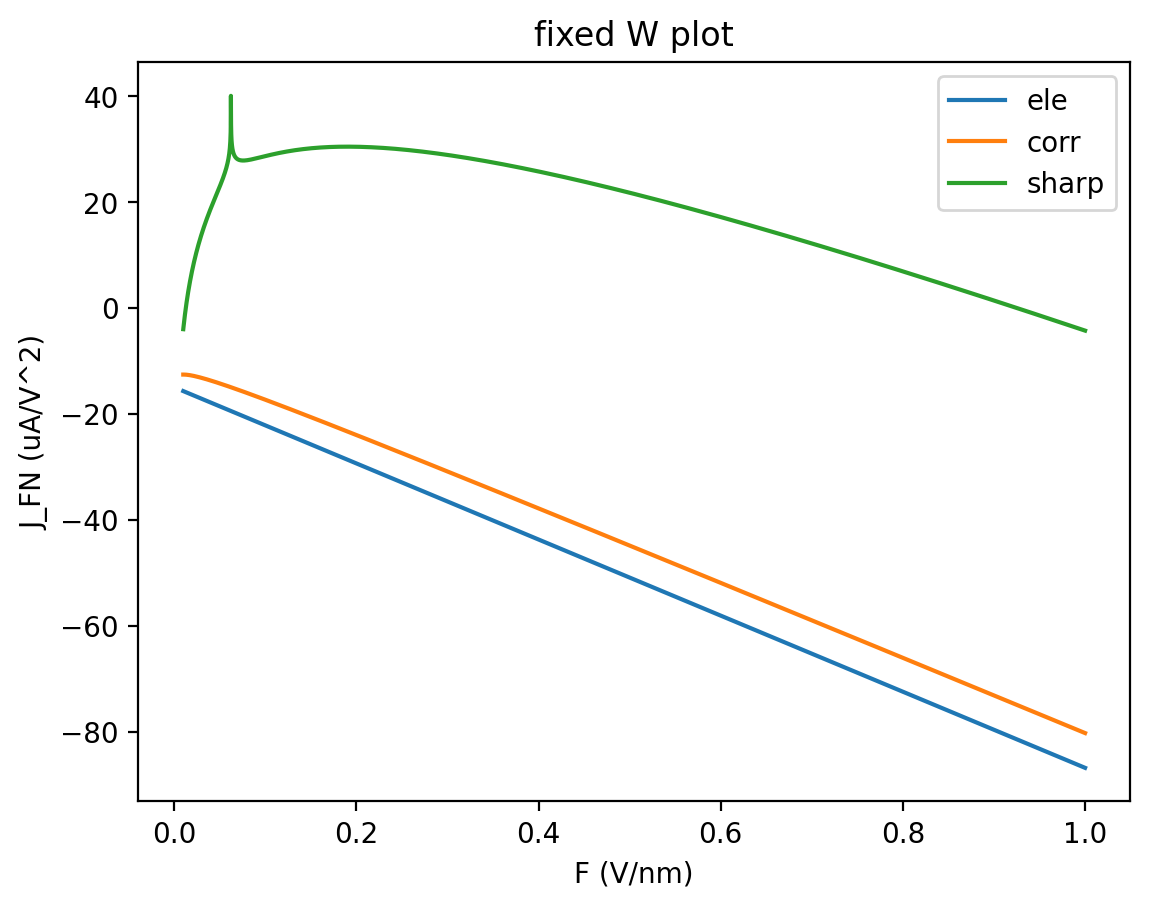

In [15]:
# FN plot

x = 1/Fd
y1 = np.log(currents_ele/Fd**2)
print(y1)
y2 = np.log(currents_corr/Fd**2)
y3 = np.log(currents_sharp/Fd**2)

plt.figure(dpi=200)

plt.plot(x, y1, label = 'ele')
plt.plot(x, y2, label = 'corr')
plt.plot(x, y3, label = 'sharp')

#plt.xlim(2, 4)
#plt.ylim(1e-11, 1e-6)
#plt.yscale("log")

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')

plt.legend()

plt.show()


# Numerical calculation done before

unfortunately I lost the paper on which I based on to make this calculation

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
plt.style.use('seaborn-v0_8')

In [15]:
def J_FN(F,W):
    aFN = 1.541434e-6
    bFN = 6.830890
    result = aFN * F**2/W * np.exp(-bFN * W**(3/2)/F)
    return result

Fd = np.arange(1, 100, 1)
Wd = np.arange(0, 30, 0.1)

J_FN_fW1 = J_FN(Fd, 4)
J_FN_fW2 = J_FN(Fd, 4.8)
J_FN_fW3 = J_FN(Fd, 5)
J_FN_fW4 = J_FN(Fd, 10)
J_FN_fW5 = J_FN(Fd, 11.5)
J_FN_fW6 = J_FN(Fd, 12)
J_FN_fW7 = J_FN(Fd, 3)

fields = [1, 3, 5, 10]
currents = []
for i in range(0,len(fields)):
    current = J_FN(fields[i], 4.8)
    currents.append(current)

print(currents)

[np.float64(2.036668583798339e-38), np.float64(1.1525818120889776e-16), np.float64(4.6245666075341674e-12), np.float64(2.4372908806223462e-08)]


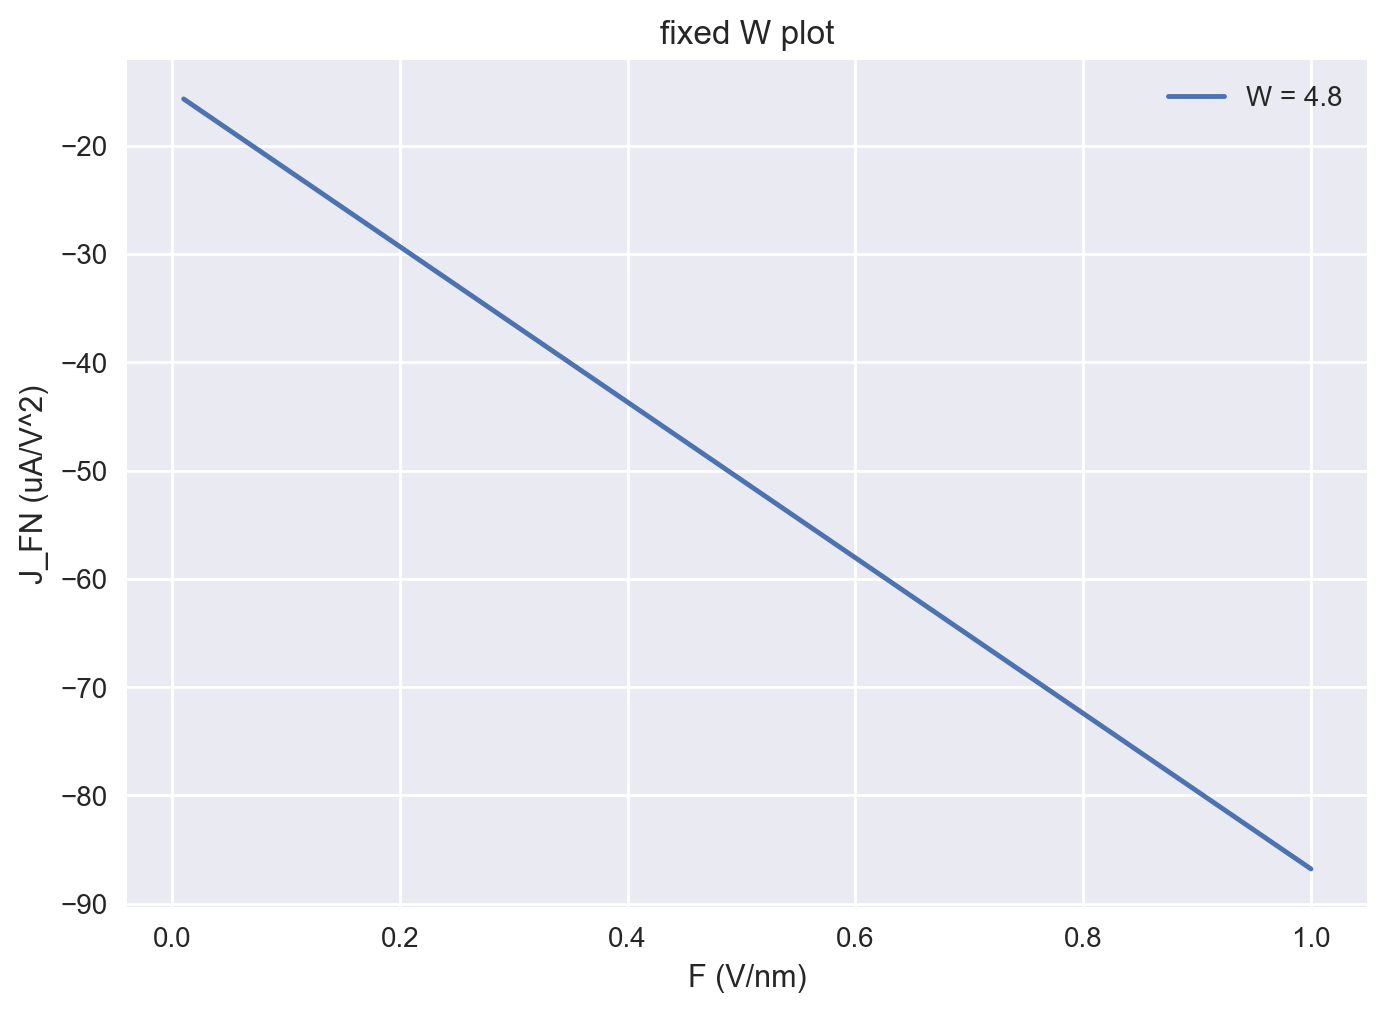

In [16]:
plt.figure(dpi=200)

x = 1/Fd
y = np.log(J_FN_fW2/Fd**2)

#plt.plot(Fd, J_FN_fW1, label = 'W = 4')

#plt.plot(Fd, J_FN_fW2, label = 'W = 4.8')
plt.plot(x, y, label = 'W = 4.8')

#plt.plot(Fd, J_FN_fW3, label = 'W = 5')
#plt.plot(Fd, J_FN_fW4, label = 'W = 10')
#plt.plot(Fd, J_FN_fW7, label = 'W = 3')

#plt.xlim(0, 100)
#plt.ylim(1e-4, 1e2)
#plt.yscale("log")
#plt.xscale('log')

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')

plt.legend()

plt.show()

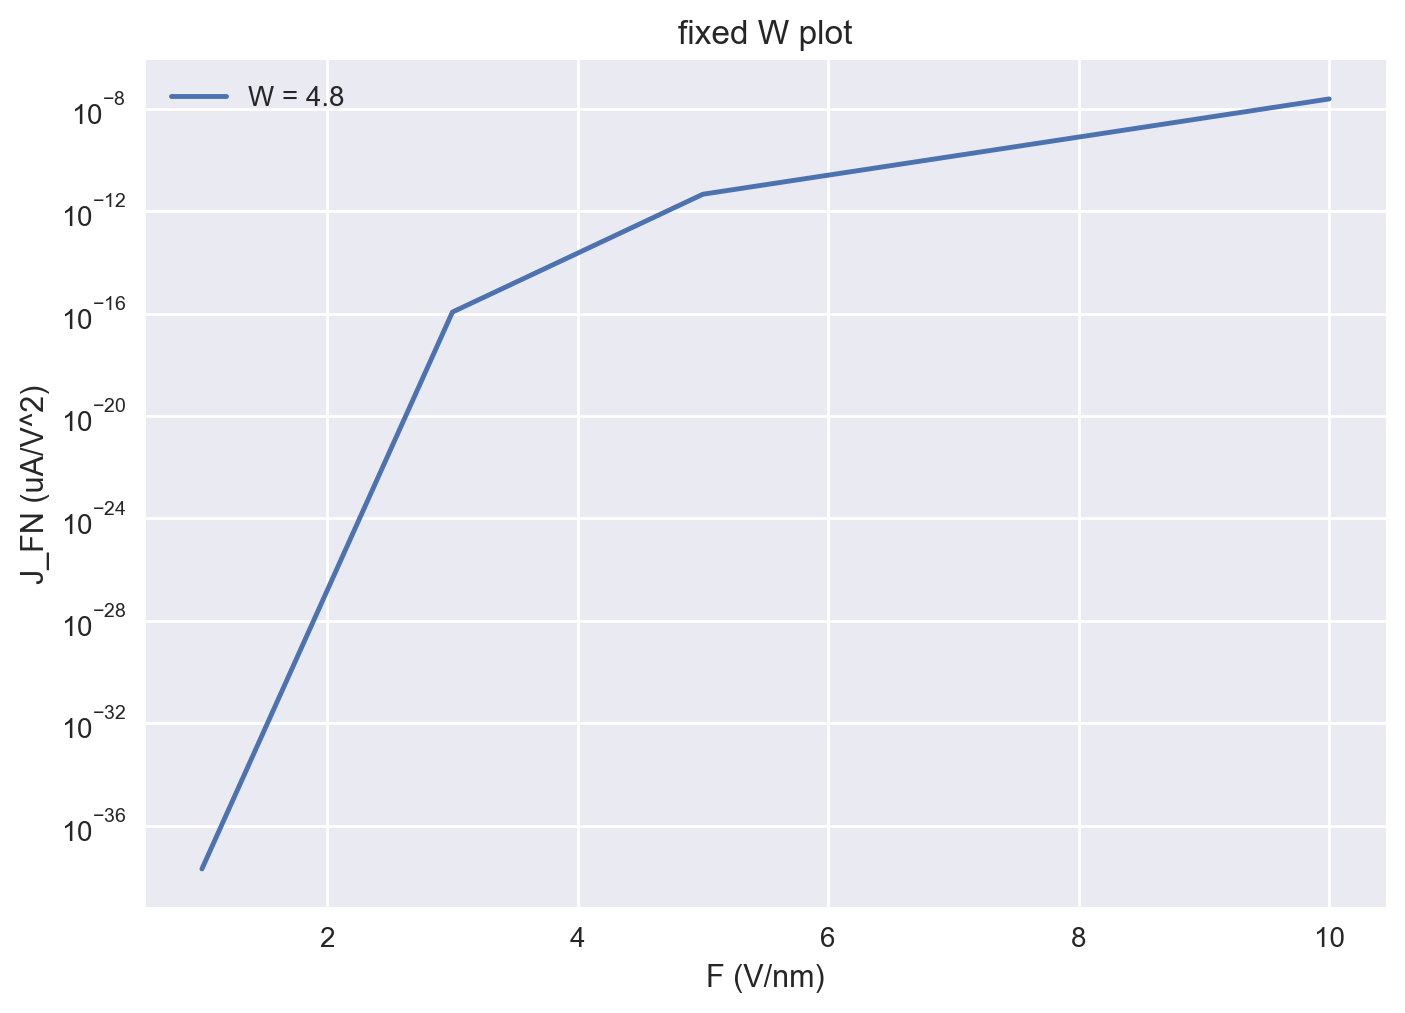

In [17]:
plt.figure(dpi=200)

plt.plot(fields, currents, label = 'W = 4.8')


#plt.xlim(4, 40)
#plt.ylim(0, 0.2)
plt.yscale("linear")

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')
plt.yscale("log")

plt.legend()

plt.show()